<b>Betweenness Centrality for Females/b>

This notebook will focus on making graphs for a female mathematician, Kate Sullivan, who was the first female contributer to the journal.

In [1]:
import csv

import numpy as np
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
#Select some data to work with for this session

#first create list using all columns
allData = []
with open('1.csv', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    #next(filereader) # skips header row, we don't want to skip since we don't have a header
    for row in filereader:
            allData.append(row)
 
#just getting kate sullivan
kate = []
edge = []
i=0
for x in allData:
    if "Kate Sullivan" in x[3] or "Kate Sullivan" in x[4]:
        edge.append([x[3],x[4]])
        kate.append(edge[i])
        i=i+1

#fix the solver column by seperating out responders, whitespace, and formatting unknowns
fixedSolver = []
edge = []
i=0

unknown = {"", "Unknown", "unknown"}
#first separate by rows
for x in kate:
    #then if there are multiple posing authors, split by newline characters
    if "\n" in x[0]:
        posers = x[0].split("\n") 
        for y in posers:
            #strip by white spaces and ignore indices with only whitespaces
            one=y.replace(' ', '')
            if "\n" in x[1] and bool(one.strip()):
                solvers = x[1].split("\n")
                #replace all unknowns
                for y in solvers:
                    two=y.replace(' ', '')
                    if(one in unknown):
                        one="UNKNOWN"
                    if(two in unknown):
                        two1="UNKNOWN"
                    fixedSolver.append([one,two])
            #check again that index is not whitespace
            elif bool(one.strip()):
                two=y.replace(' ', '')
                if(one in unknown):
                    one="UNKNOWN"
                if(two in unknown):
                    two="UNKNOWN"
                fixedSolver.append([one,two])
    #if one posing author, but multiple solvers, go through same steps with replacing newlines and unknowns
    elif "\n" in x[1]:
        solvers = x[1].split("\n")
        for y in solvers:
            one=x[0].replace(' ', '')
            two=y.replace(' ', '')
            if(one in unknown):
                one="UNKNOWN"
            if(two in unknown):
                two="UNKNOWN"
            fixedSolver.append([one,two])
    #if there's only one name in each, just ignore whitespace, replace unknowns, and add the row
    else:
        one=x[0].replace(' ', '')
        two=x[1].replace(' ', '')
        if(one in unknown):
            one="UNKNOWN"
        if(two in unknown):
            two="UNKNOWN"
        fixedSolver.append([one,two])
    #i=i+1
    
#might have some extras, so lets sort out kate sullivan again
kateS = []
edge = []
i=0
for x in fixedSolver:
    if x[0]=="KateSullivan" or x[1]=="KateSullivan":
        edge.append([x[0],x[1]])
        kateS.append(edge[i])
        i=i+1

In [73]:
kateS
#checked all other CSVs, these are the only edges that exist for Kate Sullivan

[['KateSullivan', 'Nemo'],
 ['KateSullivan', 'Hibernicus'],
 ['KateSullivan', 'S.P.*'],
 ['KateSullivan', 'Zero'],
 ['KateSullivan', 'W.J.Greenstreet(1st)'],
 ['KateSullivan', 'W.J.Greenstreet(2nd)'],
 ['KateSullivan', 'W.J.Greenstreet(3rd)'],
 ['KateSullivan', 'R.Chartres'],
 ['KateSullivan', 'H.J.Woodall'],
 ['KateSullivan', 'G.B.MZerr'],
 ['KateSullivan', 'I.Beyens'],
 ['KateSullivan', 'Hibernicus'],
 ['KateSullivan', 'JohnDixon'],
 ['KateSullivan', 'G.B.*'],
 ['KateSullivan', 'B.A.*'],
 ['KateSullivan', 'D.M.Fintray'],
 ['KateSullivan', 'Function*'],
 ['KateSullivan', 'J.Moffitt*'],
 ['KateSullivan', 'G.Carterfield*'],
 ['KateSullivan', 'Nemo*'],
 ['KateSullivan', 'J.Turnbull*'],
 ['KateSullivan', 'G.Carterfield'],
 ['KateSullivan', 'J.Giblin*'],
 ['KateSullivan', 'Nemo*'],
 ['KateSullivan', 'ThomasPigg*'],
 ['KateSullivan', 'E.Rutter*'],
 ['KateSullivan', 'Nemo'],
 ['M.Collins', 'KateSullivan'],
 ['KateSullivan', 'Hibernicus'],
 ['KateSullivan', 'Nemo*'],
 ['KateSullivan', 'Zeta*'

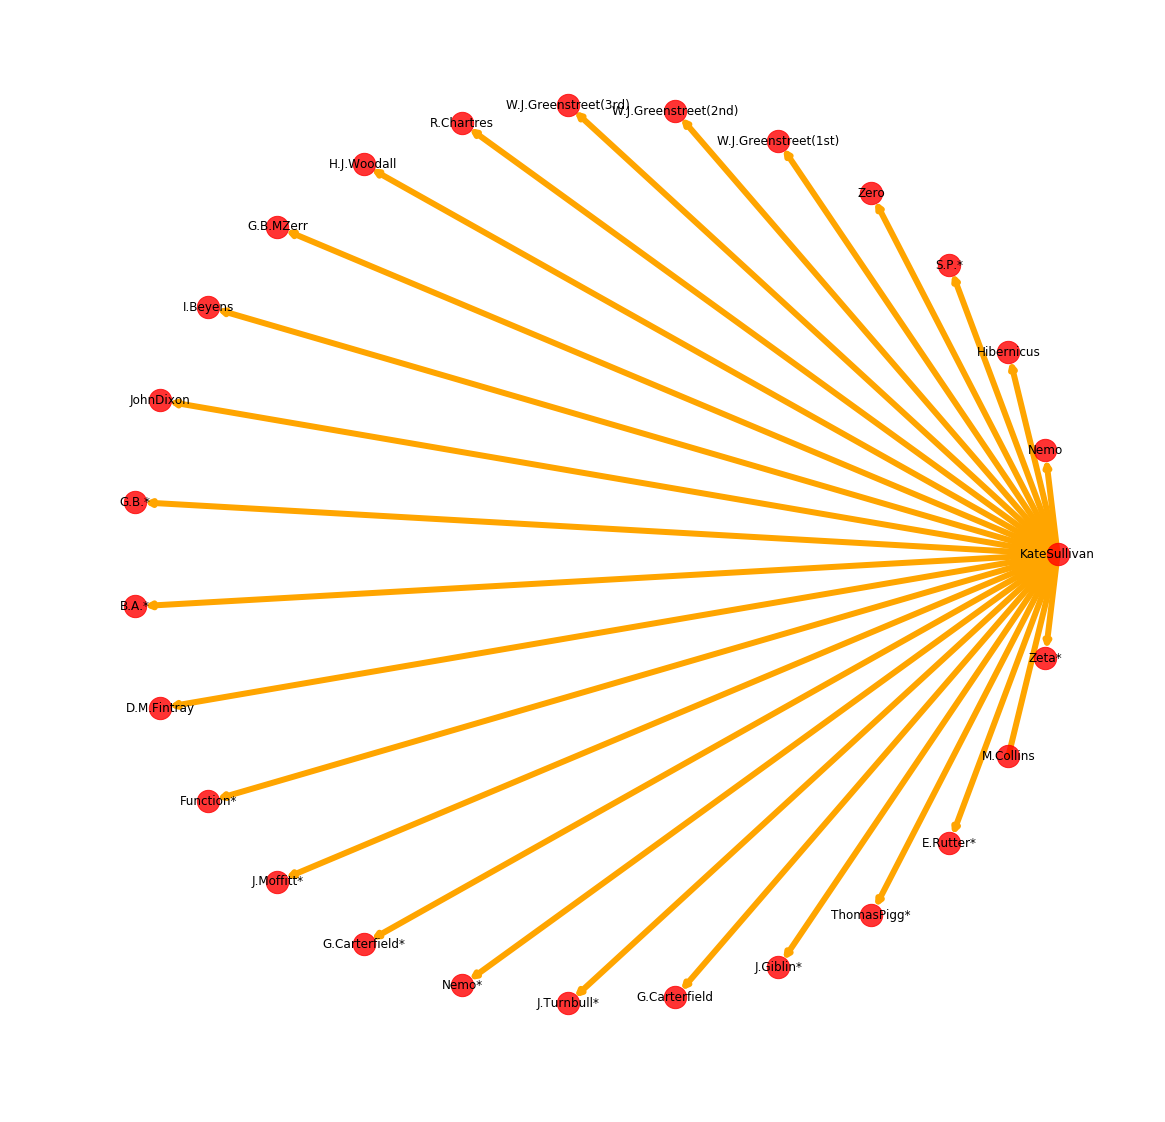

In [75]:
#thick lines are on the side of the solver
D = nx.DiGraph()
D.add_edges_from(kateS)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(D)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(D, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(D, pos=layout, width=6, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(D, pos=layout, font_size=12)

#plt.show()
plt.savefig("kateSDiGraph.png", format="PNG")

KateSullivan Nemo 2
KateSullivan Hibernicus 3
KateSullivan S.P.* 1
KateSullivan Zero 1
KateSullivan W.J.Greenstreet(1st) 1
KateSullivan W.J.Greenstreet(2nd) 1
KateSullivan W.J.Greenstreet(3rd) 1
KateSullivan R.Chartres 1
KateSullivan H.J.Woodall 1
KateSullivan G.B.MZerr 1
KateSullivan I.Beyens 1
KateSullivan Hibernicus 3
KateSullivan JohnDixon 1
KateSullivan G.B.* 1
KateSullivan B.A.* 1
KateSullivan D.M.Fintray 1
KateSullivan Function* 1
KateSullivan J.Moffitt* 1
KateSullivan G.Carterfield* 1
KateSullivan Nemo* 3
KateSullivan J.Turnbull* 1
KateSullivan G.Carterfield 1
KateSullivan J.Giblin* 1
KateSullivan Nemo* 3
KateSullivan ThomasPigg* 1
KateSullivan E.Rutter* 1
KateSullivan Nemo 2
M.Collins KateSullivan 1
KateSullivan Hibernicus 3
KateSullivan Nemo* 3
KateSullivan Zeta* 1


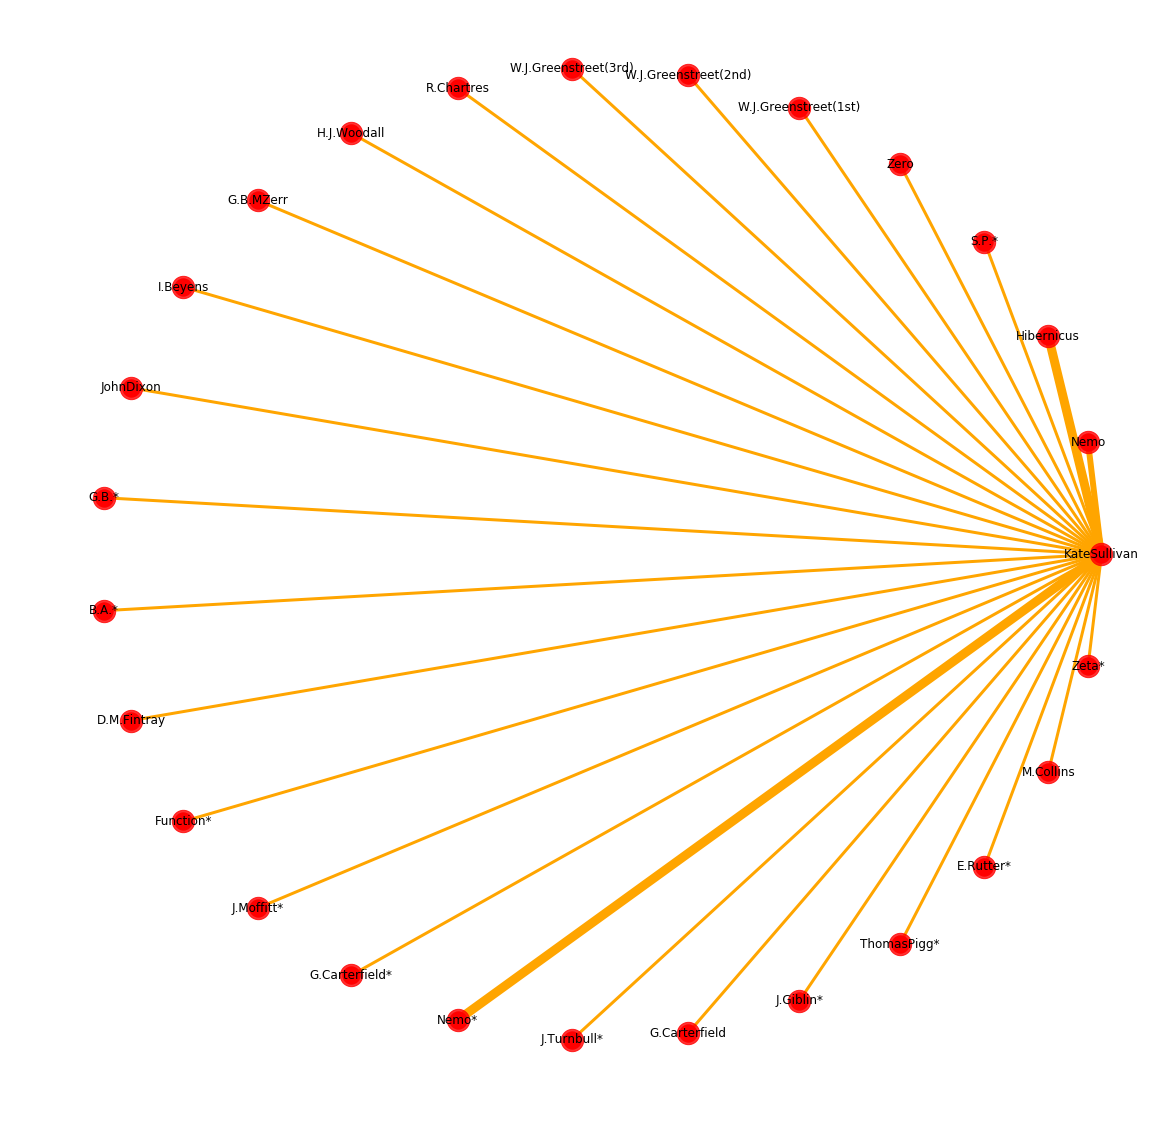

In [77]:
#need a method that takes unique authors and parses list while counting number of times an edge occurs
#between them and the same person, then use that as a weight

#g.add_edge(1,2, attr_dict={ 'thickness': 20})
#edge_thickness = [attribs['thickness'] for (v_from, v_to, attribs) in g.edges(data=True)]
#LIGHT_BLUE = '#A0CBE2'
#nx.draw(g, 
#node_size = node_size,   
#width = edge_thickness,
#node_color = LIGHT_BLUE,
#edge_color = LIGHT_BLUE,
#font_size = 15,
#with_labels = True)

#lets try using fixedSolver...
weighted = nx.Graph()
for x in kateS:
    num=0;
    for solver in kateS:
        if (x[1]==solver[1]) and (x[0]==solver[0]):
            num=num+1
    print(x[0],x[1],num)
    num=num*3;
    weighted.add_edge(x[0],x[1], weight=num)

    
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
    
# generate the layout and place nodes and edges
layout = nx.circular_layout(weighted)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(weighted, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_labels(weighted, pos=layout, font_size=12)

edges = weighted.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [weighted[u][v]['weight'] for u,v in edges]

nx.draw(weighted, pos=layout, edges=edges, width=weights, edge_color='orange')

plt.savefig("kateSweighted.png", format="PNG")